We are using Amazon reviews data for sentimental analysis.In this we are using streamlit lib to create the web app that will provide the functionality of :-
* Input Text Sentiment Analysis
* Upload the csv file to get sentiments of reviews
* Also it will convet the voice into text and show it's sentiments (Speech to text)

here is the link for data:-
https://www.kaggle.com/datasets/jagdishchavan/amazon-reviews


For sentimental Analysis we are following these steps:-
* EDA of the Amazon_reviews
* Data Preprocessing
* Train-Test Split
* Feature Engineering
* Model Selection and Training
* Model Evaluation
* Hyperparameter Tuning
* Last we doing sentimental analysis for-
* user input text , by upload csv file or by speech to text



In [1]:
# import the library

import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.corpus import stopwords


In [2]:
# installing library
!pip install pyngrok
!pip install wordcloud
!pip install streamlit



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


In [3]:
# we are directly upload the amazon_reviews from side bar options. now read it by panda

data = pd.read_excel('Amazon_reviews.xlsx')
print(f"Dataset shape : {data.shape}")

Dataset shape : (72360, 10)


EDA OF DATA

In [4]:
# View the top 5 row of data
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
#Column names

print(f"Feature names : {data.columns.values}")

Feature names : ['Id' 'ProductId' 'UserId' 'ProfileName' 'HelpfulnessNumerator'
 'HelpfulnessDenominator' 'Score' 'Time' 'Summary' 'Text']


In [6]:
# Now we select the required column which is essential for sentimental analysis
data1 = data[['Text' , 'Score']]

In [7]:
data1.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [8]:
#Check for missing values

data1.isnull().sum()

Text     0
Score    0
dtype: int64

We found there is no missing values


In [9]:
# Now we check for record score wise
data1.Score.value_counts()

Score
1    18245
5    15468
4    15190
2    13838
3     9619
Name: count, dtype: int64

In [10]:
# Now we check for duplicate values
data1[data1.duplicated()]


,Text,Score
29,I don't know if it's the cactus or the tequila...,5
574,"I'm addicted to salty and tangy flavors, so wh...",5
603,"I'm addicted to salty and tangy flavors, so wh...",5
1973,The pork chops from Omaha Steaks were very tas...,3
2309,Too much of the white pith on this orange peel...,2
...,...,...
72311,"If anyone has a membership to Sam's Club, they...",3
72312,"I'm not sure what happened, but my box of ""54 ...",1
72313,the salt is wet and i dont like that. it's not...,3
72346,Went into the dumpster the very first night. M...,1


In [11]:
# Now Drop the duplicate
data2 = data1.drop_duplicates()

print(f"Dataset shape after droping the duplicate values : {data2.shape}")


Dataset shape after droping the duplicate values : (62641, 2)


In [12]:
# Now we analysis score column
data2.Score.value_counts()

Score
5    14990
1    14948
4    13514
2    11063
3     8126
Name: count, dtype: int64

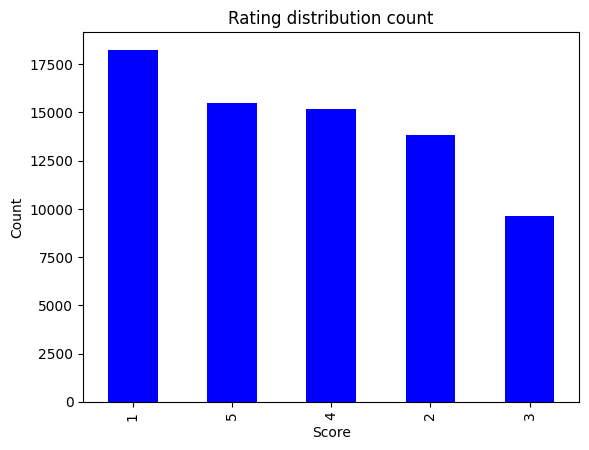

In [13]:
#Bar plot to visualize the total counts of each rating

data['Score'].value_counts().plot.bar(color = 'blue')
plt.title('Rating distribution count')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

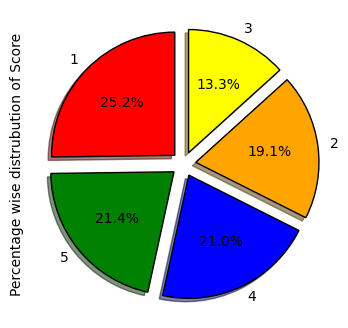

In [14]:
fig = plt.figure(figsize=(4,4))
colors = ('red', 'green', 'blue','orange','yellow')
wp = {'linewidth':1, "edgecolor":'black'}
tags = data['Score'].value_counts()/data2.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Score')
from io import  BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

In [15]:
data2.describe

<bound method NDFrame.describe of                                                     Text  Score
0      I have bought several of the Vitality canned d...      5
1      Product arrived labeled as Jumbo Salted Peanut...      1
2      This is a confection that has been around a fe...      4
3      If you are looking for the secret ingredient i...      2
4      Great taffy at a great price.  There was a wid...      5
...                                                  ...    ...
72355  This version of Pacific Chai is pretty mild.  ...      3
72356  The candy is tasty, but they totally scam you ...      1
72357  Definitely not worth buying flavored water wit...      1
72358  I thought this soup would be more like a chill...      1
72359  I just bought this soup today at my local groc...      1

[62641 rows x 2 columns]>

In [16]:
# create the function for mapping the sentiment
def map_sentiment(Score):
    if Score > 3 :
        return 'Positive'
    elif  Score == 3:
        return 'Netural'
    else :
        return 'Negative'

In [17]:
data2['Review']=  data2['Score'].apply(lambda x :map_sentiment(x))


<ipython-input-17-b4ba8ed38533>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Review']=  data2['Score'].apply(lambda x :map_sentiment(x))


In [18]:
data2.head()

,Text,Score,Review
0,I have bought several of the Vitality canned d...,5,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,1,Negative
2,This is a confection that has been around a fe...,4,Positive
3,If you are looking for the secret ingredient i...,2,Negative
4,Great taffy at a great price. There was a wid...,5,Positive


Preprocess the text

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
# Get the list of stopwords from NLTK corpus
stopwords_list = stopwords.words('english')
total_stopwords = set(stopwords_list)

# Identify negative stopwords and remove them from total_stopwords
negative_stop_words = set(word for word in total_stopwords
                           if "n't" in word or 'no' in word)
final_stopwords = total_stopwords - negative_stop_words

# Add the word "one" to final_stopwords
final_stopwords.add("one")

# Print the final set of stopwords
print(final_stopwords)


{'as', 'they', 'yourselves', 'during', 'themselves', 'm', 'or', 'own', 'should', 'is', 'hasn', 'myself', 'how', 'that', 'below', 'can', 'these', 'in', 'before', 'under', 'couldn', 'few', 'then', 'the', 'needn', 're', 'which', 'are', 'to', 'does', 'i', 'very', 'a', 'them', 'itself', 'we', 'any', 'same', 'each', 'more', 'didn', 'her', 'him', 'an', 'it', 'because', 'of', 'wasn', 'our', 'am', 'o', 'between', 't', 'here', 'for', 'weren', 'through', 'once', 'such', 'y', 'doesn', 'have', 'be', 'over', 'what', 'only', 'about', 'had', 'after', "it's", 'hers', 'd', 'do', 'doing', "should've", 'yourself', 'me', 'won', 'was', "you'd", 'll', 'aren', 'why', 'down', 'will', 'out', 'and', 'its', 'other', 'by', 'where', 'just', 'again', 'than', 'haven', 'further', 's', 'while', 'one', 'into', 'my', 'your', 'yours', 'too', 'ours', 'hadn', 'most', 'being', 'but', 'who', 'mightn', 'from', 'ma', 'until', 'were', 'when', 'against', 'he', 'don', 'with', 've', 'on', 'his', 'their', 'those', "you'll", 'you', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
# removing for html tag, white space and digit from reviews

stemmer = PorterStemmer()
HTMLTAGS = re.compile('<.*?>')
table = str.maketrans (dict.fromkeys (string.punctuation))
remove_digits = str. maketrans('', '', string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")

In [21]:
def Text_preprocessor (review):
    # remove html tags
    review = HTMLTAGS. sub (r'', review)
    # remove puncutuation
    review = review.translate(table)
    # remove digits
    review = review.translate (remove_digits)
    # Lower case all letters
    review = review.lower()
    # replace multiple white spaces with single space
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()
    # remove stop words
    review = [word for word in review.split()
              if word not in final_stopwords]
    # stemming
    review =' '.join([stemmer.stem (word) for word in review])

    return review

In [22]:
text = 'Tea is wisdom in a cup, steeped with lessons from the ages'
Text_preprocessor (text)

'tea wisdom cup steep lesson age'

In [23]:
# now we use wordcloud for analyse for words
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wcloud(text):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(text)
    plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

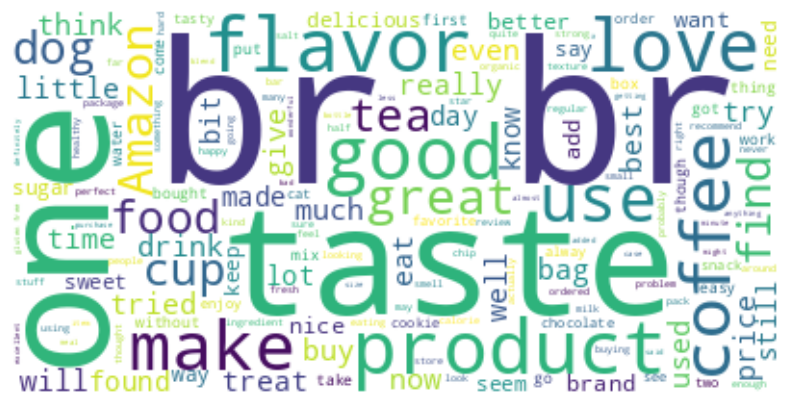

In [24]:
# Analyze the positive text
pos = data2.loc[data2.Review == "Positive"].Text
text = " ".join(review for review in pos.astype(str))
generate_wcloud(text)


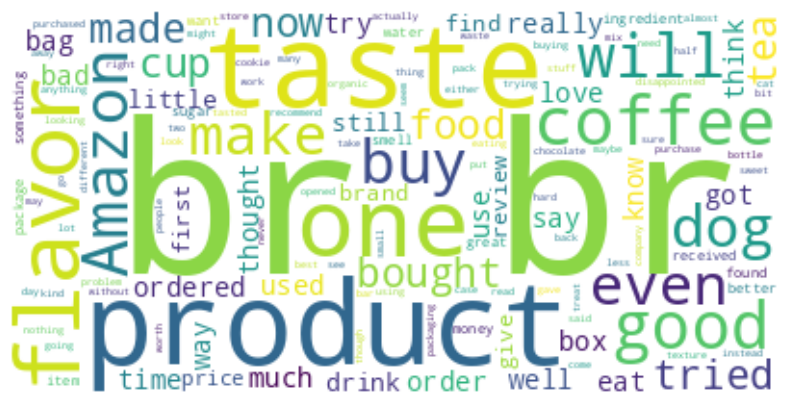

In [25]:
# Analyze the Negative text
Neg = data2.loc[data2. Review == "Negative"]. Text
text = " ".join(review for review in Neg.astype (str))
generate_wcloud (text)

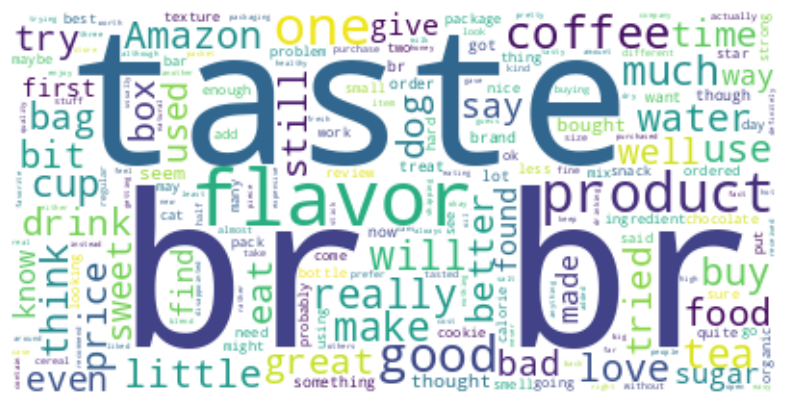

In [26]:
# Analyze the Netural text
pos = data2.loc[data2.Review == "Netural"].Text
text = " ".join(review for review in pos.astype(str))
generate_wcloud(text)

In [27]:
#Splitting data into train and test set with 20% data with testing.
X = data2.Text
y = data2.Review
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1, stratify=y)
X_train.shape, X_test.shape

((50112,), (12529,))

Feature Engineering

In [28]:
# feature engineering using the Bag-of-Words (BoW)
bow_vectorizer = CountVectorizer (max_features=10000)
bow_vectorizer.fit(X_train)

#transform
bow_X_train = bow_vectorizer.transform(X_train)
bow_X_test = bow_vectorizer.transform(X_test)


In [29]:
# feature engineering using TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)
# transform
tfidf_X_train = tfidf_vectorizer.transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)

In [30]:
# Label Encoding for Target Variable
labelEncoder = LabelEncoder()
y_train =  labelEncoder.fit_transform(y_train)
y_test =  labelEncoder.transform(y_test)

# Get the list of classes after label encoding
labels = labelEncoder.classes_.tolist()
print(labels) # index-> class


['Negative', 'Netural', 'Positive']


Training and Evaluation of Model

In [31]:
def train_and_eval (model, trainX, trainY, testX, testY):
    # training
    model.fit(trainX, trainY)
    # predictions
    y_preds_train = model.predict(trainX)
    y_preds_test = model.predict(testX)
    # evaluation print()
    print(model)
    print (f" Train accuracy score: {accuracy_score (y_train, y_preds_train)}")
    print (f"Test accuracy score: {accuracy_score (y_test, y_preds_test)}")
    print('\n',40*'-')

In [32]:
# Logistic Regression Model with Hyperparameters and Count Vectorization
# Hyperparameter values for regularization strength (C)

C = [0.001, 0.01, 0.1, 1, 10]
for c in C:
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)
    # Train and evaluate model
    train_and_eval( model= log_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
 Train accuracy score: 0.7400423052362708
Test accuracy score: 0.7374890254609306

 ----------------------------------------
LogisticRegression(C=0.01, max_iter=500, random_state=1)
 Train accuracy score: 0.7874361430395913
Test accuracy score: 0.7674195865591827

 ----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1, max_iter=500, random_state=1)
 Train accuracy score: 0.8359474776500638
Test accuracy score: 0.7686168090031128

 ----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, max_iter=500, random_state=1)
 Train accuracy score: 0.8783924010217113
Test accuracy score: 0.7481043977971107

 ----------------------------------------
LogisticRegression(C=10, max_iter=500, random_state=1)
 Train accuracy score: 0.8938577586206896
Test accuracy score: 0.7267938382951552

 ----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# Naive Bayes Model with Hyperparameters and Count Vectorization
# Hyperparameters value for alphas

alphas =[0, 0.2, 0.6, 0.8, 1]
for a in alphas:
    # Define model
    nb_model = MultinomialNB(alpha=a)
    # Train and evaluate model
    train_and_eval (model=nb_model,
                    trainX=bow_X_train,
                    trainY=y_train,
                    testX =bow_X_test,
                    testY=y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


MultinomialNB(alpha=0)
 Train accuracy score: 0.7586805555555556
Test accuracy score: 0.7181738366988587

 ----------------------------------------
MultinomialNB(alpha=0.2)
 Train accuracy score: 0.75349217752235
Test accuracy score: 0.718253651528454

 ----------------------------------------
MultinomialNB(alpha=0.6)
 Train accuracy score: 0.7513569604086845
Test accuracy score: 0.7176151328916913

 ----------------------------------------
MultinomialNB(alpha=0.8)
 Train accuracy score: 0.7511574074074074
Test accuracy score: 0.718014207039668

 ----------------------------------------
MultinomialNB(alpha=1)
 Train accuracy score: 0.7504988825031929
Test accuracy score: 0.71849309601724

 ----------------------------------------


In [34]:
# Logistic Regression Model with Hyperparameters and TF-IDF Vectorization
# Hyperparameter values for regularization strength (C)

C = [0.001, 0.01, 0.1, 1, 10]
for c in C:
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)
    # Train and evaluate model
    train_and_eval( model= log_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)

LogisticRegression(C=0.001, max_iter=500, random_state=1)
 Train accuracy score: 0.5735352809706258
Test accuracy score: 0.5713943650730305

 ----------------------------------------
LogisticRegression(C=0.01, max_iter=500, random_state=1)
 Train accuracy score: 0.7184107598978289
Test accuracy score: 0.7153005028334265

 ----------------------------------------
LogisticRegression(C=0.1, max_iter=500, random_state=1)
 Train accuracy score: 0.7650263409961686
Test accuracy score: 0.7587995849628861

 ----------------------------------------
LogisticRegression(C=1, max_iter=500, random_state=1)
 Train accuracy score: 0.817448914431673
Test accuracy score: 0.7762790326442653

 ----------------------------------------
LogisticRegression(C=10, max_iter=500, random_state=1)
 Train accuracy score: 0.8657008301404853
Test accuracy score: 0.7591986591108628

 ----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# Naive Bayes Model with Hyperparameters and TF-IDF Vectorization
# Hyperparameters value for alphas

alphas =[0, 0.2, 0.6, 0.8, 1]
for a in alphas:
    # Define model
    nb_model = MultinomialNB(alpha=a)
    # Train and evaluate model
    train_and_eval (model=nb_model,
                    trainX=tfidf_X_train,
                    trainY=y_train,
                    testX =tfidf_X_test,
                    testY=y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


MultinomialNB(alpha=0)
 Train accuracy score: 0.7720306513409961
Test accuracy score: 0.7408412483039348

 ----------------------------------------
MultinomialNB(alpha=0.2)
 Train accuracy score: 0.768698116219668
Test accuracy score: 0.7433953228509858

 ----------------------------------------
MultinomialNB(alpha=0.6)
 Train accuracy score: 0.7644476372924649
Test accuracy score: 0.742756804214223

 ----------------------------------------
MultinomialNB(alpha=0.8)
 Train accuracy score: 0.7630507662835249
Test accuracy score: 0.7417192114294836

 ----------------------------------------
MultinomialNB(alpha=1)
 Train accuracy score: 0.7616938058748404
Test accuracy score: 0.7402027296671722

 ----------------------------------------


Best Model after checking the accuracy and result

In [36]:
# Best model : Logistic Regression(C=1) with TF-IDF Vectorization
bmodel = LogisticRegression (C=1, max_iter=500, random_state=1)
bmodel.fit(tfidf_X_train, y_train)

LogisticRegression(C=1, max_iter=500, random_state=1)

In [37]:
# Making Predictions using Trained Model
# Predictions on traing data
y_preds_train = bmodel.predict(tfidf_X_train)
# Predictions on test data
y_preds_test = bmodel.predict(tfidf_X_test)

In [38]:
print(f"Train accuracy score: {accuracy_score (y_train, y_preds_train)}")
print (f"Test accuracy score: {accuracy_score (y_test, y_preds_test)}")

Train accuracy score: 0.817448914431673
Test accuracy score: 0.7762790326442653


In [39]:
# function for confusion matrix
def plot_cm(y_true, y_pred):
    plt.figure(figsize=(6,6))
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(
        cm , annot=True, cmap='Blues', cbar=False, fmt='.2f',
        xticklabels=labels, yticklabels=labels)
    return plt.show()


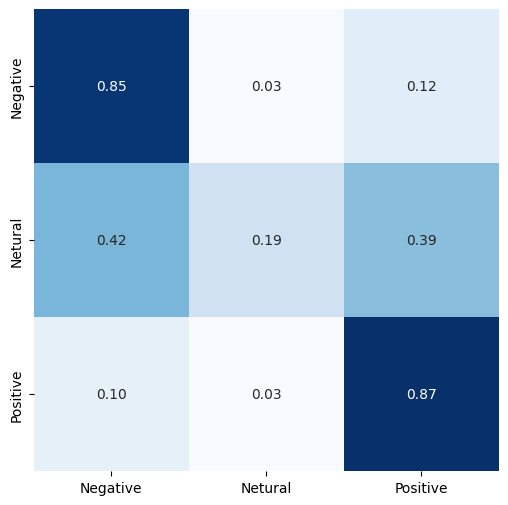

In [40]:
plot_cm(y_test, y_preds_test)

Now we save the model pkl file in local machine. this we will use in ide for createing web app by useing streamlit lib

In [41]:
#save and transfrom model
import pickle
with open ("transform.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)
with open("sentiment-prediction-model.pkl", "wb") as f:
    pickle.dump(bmodel,f)

In [42]:
# Download transform.pkl

from google.colab import files
files.download("transform.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
# Download sentiment-prediction-model.pkl

files.download("sentiment-prediction-model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
# predection on input review
def get_sentiment(review):
    x= Text_preprocessor(review)
    X= tfidf_vectorizer.transform([x])
    y= int(bmodel.predict(X.reshape(1,-1)))
    return labels[y]

In [45]:
review = "wrost product never buy it again"
print(f"this is  {get_sentiment(review)} review")

this is  Negative review


<ipython-input-44-da38d32a1d89>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y= int(bmodel.predict(X.reshape(1,-1)))


In [46]:
review = "product is extremly perfect. nave nice look"
print(f"this is  {get_sentiment(review)} review")

this is  Positive review


<ipython-input-44-da38d32a1d89>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y= int(bmodel.predict(X.reshape(1,-1)))


Here we are creating simple web app by steamlit. Main web app we create in ide

In [47]:
%%writefile app.py
import streamlit as st
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from nltk.stem import PorterStemmer
import re
import string

# Import NLTK and download necessary resources
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Load the trained model and vectorizer
with open("transform.pkl", "rb") as f:
    tfidf_vectorizer = pickle.load(f)

with open("sentiment-prediction-model.pkl", "rb") as f:
    bmodel = pickle.load(f)

# Load the label encoder and classes
labelEncoder = LabelEncoder()
labelEncoder.classes_ = ['Negative', 'Neutral', 'Positive']

# Load the stemming object
stemmer = PorterStemmer()

HTMLTAGS = re.compile('<.*?>')
table = str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('', '', string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")

# Define the stopwords
stopwords_list = set(stopwords.words('english'))
negative_stop_words = set(word for word in stopwords_list if "n't" in word or 'no' in word)
final_stopwords = stopwords_list - negative_stop_words
final_stopwords.add("one")

def Text_preprocessor(review):
    review = HTMLTAGS.sub(r'', review)
    review = review.translate(table)
    review = review.translate(remove_digits)
    review = review.lower()
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()
    review = [word for word in review.split() if word not in final_stopwords]
    review = ' '.join([stemmer.stem(word) for word in review])
    return review

def get_sentiment(review):
    x = Text_preprocessor(review)
    X = tfidf_vectorizer.transform([x])
    y = int(bmodel.predict(X.reshape(1, -1)))
    return labelEncoder.classes_[y]

# Streamlit app
st.title("Sentiment Analysis App")

input_text = st.text_input("Enter your text here:")
if st.button("Analyze"):
    if input_text:
        sentiment = get_sentiment(input_text)
        st.success(f"The sentiment of the text is {sentiment}")
    else:
        st.warning("Please enter some text.")


Writing app.py


In [48]:
!apt-get install -y ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


Address is used for Tunnel passwaord

In [49]:
! wget -q -O - ipv4.icanhazip.com

34.27.93.222


Click on the last Link and use the above password for redirecting to streamlit web page


In [50]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.27.93.222:8501

npx: installed 22 in 4.206s
your url is: https://cyan-toys-sing.loca.lt
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/content/app.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = int(bmodel.predict(X.reshape(1, -1)))
  Stopping...
^C
